<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/04.06-Electrically-Heated-Stirred-Tank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electrically Heated Stirred Tank

This notebook shows how to use functions from `sympy`to symbolic solve a dynamic model presented in Seborg 4<sup>th</sup> ed. p. 23.

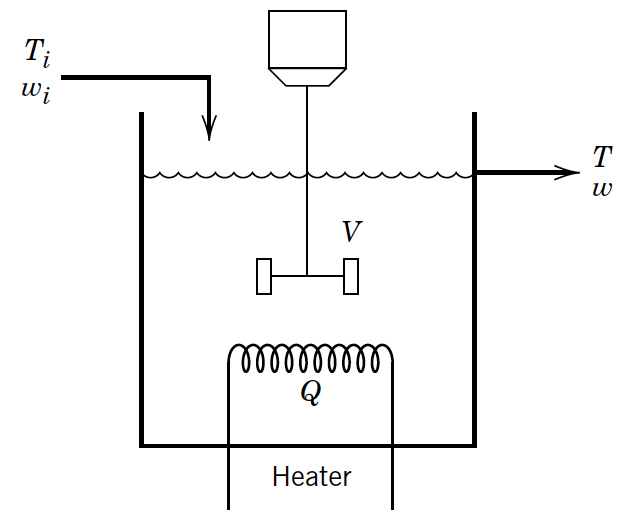

In [ ]:
from sympy import *

In [ ]:
t, m, C, m_e, C_e, w, h_e, A_e = symbols('t, m, C, m_e, C_e, w, h_e, A_e')
T   = Function('T')
T_i = Function('T_i')
T_e = Function('T_e')
Q   = Function('Q')

Equation 2-47

In [ ]:
mCdT_dt = Eq(m*C*Derivative(T(t), t), w*C*(T_i(t) - T(t)) + h_e*A_e*(T_e(t) - T(t)))
mCdT_dt

Eq(C*m*Derivative(T(t), t), A_e*h_e*(-T(t) + T_e(t)) + C*w*(-T(t) + T_i(t)))

Equation 2-48

In [ ]:
meCedTe_dt = Eq(m_e*C_e*Derivative(T_e(t), t), Q(t) - h_e*A_e*(T_e(t) - T(t)))
meCedTe_dt

Eq(C_e*m_e*Derivative(T_e(t), t), -A_e*h_e*(-T(t) + T_e(t)) + Q(t))

Solving equation 2-47 for $T_e(t)$

In [ ]:
T_e_ = Eq(T_e(t), solve(mCdT_dt, T_e(t))[0])
T_e_

Eq(T_e(t), (A_e*h_e*T(t) + C*m*Derivative(T(t), t) + C*w*T(t) - C*w*T_i(t))/(A_e*h_e))

Taking the derivative of $T_e(t)$

In [ ]:
dTe_dt = Eq(Derivative(T_e(t), t), Derivative(T_e_.rhs, t)).simplify()
dTe_dt

Eq(Derivative(T_e(t), t), (A_e*h_e*Derivative(T(t), t) + C*m*Derivative(T(t), (t, 2)) + C*w*Derivative(T(t), t) - C*w*Derivative(T_i(t), t))/(A_e*h_e))

Substituting the $T_e(t)$ and $\frac{dT_e(t)}{dt}$ expressions into equation 2-48 we come up with equation 2-49

In [ ]:
d2T_dt2 = meCedTe_dt.subs({T_e(t): T_e_.rhs, Derivative(T_e(t), t): dTe_dt.rhs}).expand()
d2T_dt2

Eq(C_e*m_e*Derivative(T(t), t) + C*C_e*m*m_e*Derivative(T(t), (t, 2))/(A_e*h_e) + C*C_e*m_e*w*Derivative(T(t), t)/(A_e*h_e) - C*C_e*m_e*w*Derivative(T_i(t), t)/(A_e*h_e), -C*m*Derivative(T(t), t) - C*w*T(t) + C*w*T_i(t) + Q(t))

EXAMPLE 2.4 (from Seborg 4<sup>th</sup> ed. p. 23)

Let's solve letter (a). At the steady-state all derivatives are zero, so equation 2-49 will be

In [ ]:
T_bar = symbols(r'\bar{T}')
T_i_bar = symbols(r'\bar{T_i}')
Q_bar = symbols(r'\bar{Q}')
d2T_dt2_ss = d2T_dt2.subs({T(t):T_bar,
                           Derivative(T(t),t):0,
                           Derivative(T(t),t,2):0,
                           T_i(t):T_i_bar,
                           Derivative(T_i(t),t):0,
                           Q(t):Q_bar
                           })
d2T_dt2_ss

Eq(0, C*\bar{T_i}*w - C*\bar{T}*w + \bar{Q})

Substituting the parameters values, we have

In [ ]:
d2T_dt2_ss = d2T_dt2_ss.subs({w*C:1/0.05,
                              T_i_bar:100,
                              Q_bar:5000
                              })
d2T_dt2_ss

Eq(0, 7000.0 - 20.0*\bar{T})

Solving for $\bar{T}$

In [ ]:
T_bar_ = Eq(T_bar, solve(d2T_dt2_ss, T_bar)[0])
T_bar_

Eq(\bar{T}, 350.0)

Let's solve letter (b).

In [ ]:
d2T_dt2_ = d2T_dt2.subs({w*C: 1/0.05, C*m: 200, C_e*m_e: 20, A_e*h_e: 20, T_i(t): 100, Q(t): 5400})
ics = {T(0): 350, Derivative(T(t),t).subs(t,0): 0}
d2T_dt2_

Eq(-20.0*Derivative(100, t) + 40.0*Derivative(T(t), t) + 200*Derivative(T(t), (t, 2)), -20.0*T(t) - 200*Derivative(T(t), t) + 7400.0)

In [ ]:
Tsoln = dsolve(d2T_dt2_, ics=ics)
print('Solution is', Tsoln)

Solution is Eq(T(t), 370.0 + 1.76696810829104*exp(-1.10990195135928*t) - 21.766968108291*exp(-0.0900980486407215*t))


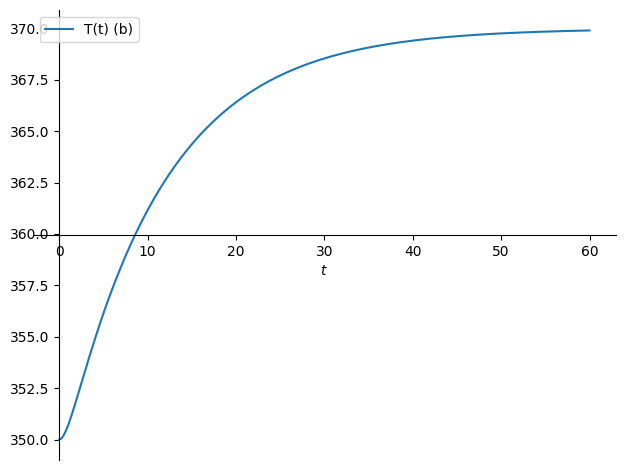

In [ ]:
pb = plot(solve(Tsoln, T(t))[0], (t, 0, 60), show=False, label='T(t) (b)', legend=True, ylabel='')
pb.show()

Let's solve letter (c). In this case, if we consider that $m_eC_e$ is negligible, equation 2-49 will be first order instead

In [ ]:
d2T_dt2__ = d2T_dt2_.subs({Derivative(T(t),t,2):0})
ics = {T(0): 350}
d2T_dt2__

Eq(-20.0*Derivative(100, t) + 40.0*Derivative(T(t), t), -20.0*T(t) - 200*Derivative(T(t), t) + 7400.0)

In [ ]:
Tsoln = dsolve(d2T_dt2__, ics=ics)
print('Solution is', Tsoln)

Solution is Eq(T(t), 370.0 - 20.0*exp(-0.0833333333333333*t))


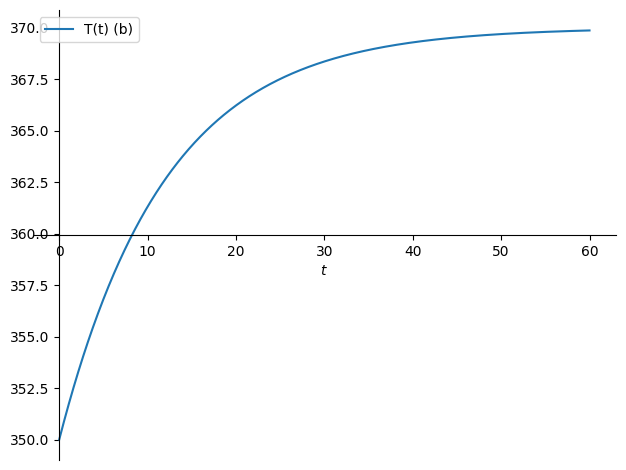

In [ ]:
pc = plot(solve(Tsoln, T(t))[0], (t, 0, 60), show=False, label='T(t) (b)', legend=True, ylabel='')
pc.show()

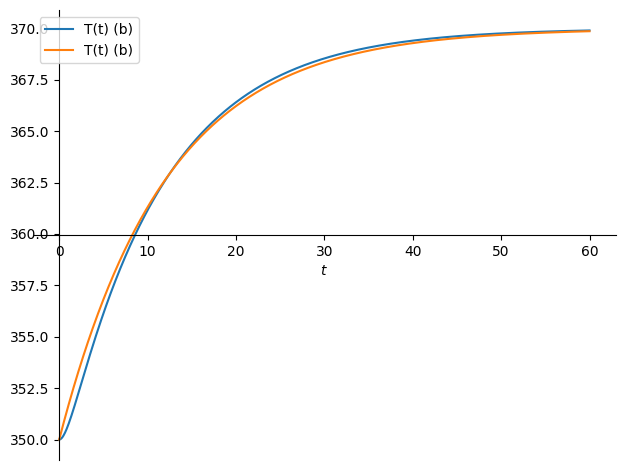

In [ ]:
pb.append(pc[0])
pb.show()